# GAN: Completely Build Anime Face Generator

Hi, If you interest to learn how to create GAN Model. 

It's also helpfull for your, becuse this is create usefull project you can share anyone.

Why you wait Let's chack out.

* **First chapter:** In this chapter you import all libary and Download Dataset.
* **Second Chapter:** Some Data Preprocessing becuse convert raw data to pytorch dataset create and also display some sample of the image.
* **Third Chapter:** Create Generator and Discriminator Class and little bit say what is do this two class.
* **Fourth Chapter:** Train Generator and Discriminator Model and see
what happen to do.

This are above 4 step I follow to complete this project.

And also one thing I say please you using GPU not CPU. That mean is not buy any huge price of GPU, just go with google collab free GPU or If you already purchess that is fine.


Notice Dowbelow one line of code to show can I using GPU. That is important for this project.

In [ ]:
# Can I use GPU
!nvidia-smi -L

/bin/bash: nvidia-smi: command not found


## First Chapter: Import All Libary and Download Dataset

It's your first chapter to this article already know about.

Brif introduce Of this chapter: In this chapter you import some of the libary which i neede for this project.

Than move on to download dataset step by step and unzip the file.

Now this simple thing to do in first chapter. If any problem is come form this article make sure you ask me question.

In [ ]:
# Import some of the main libary for using this notebook. 
import torch
import numpy as np
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision import datasets
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import os
from PIL import Image
import matplotlib.pyplot as plt


torch.manual_seed(0) # Set for our testing purposes, please do not change!

# This are some of the hyperparameter value I used later.
z_dim = 10 # It's used to dimensation of the noise vector
display_step = 450 # It's used for how many time to train before visualize model generate image and actual image.
batch_size = 128 # It's specify to batch size 
lr = 0.0001 # This value specify to learning rate of the model optimizer.
beta_1 = 0.5 
beta_2 = 0.999
device = "cuda" if torch.cuda.is_available() else "cpu" # I connect GPU than return cuda If not than return cpu


In [ ]:
# Create One dataset folder to store my actual unzip dataset file
!mkdir "dataset"

Now you know about which dataset to using for me. and also see some small step to follow complete download dataset and unzip file.

**Step-To-Follow:**
   * **First** go to this [dataset page](https://www.kaggle.com/datasets/splcher/animefacedataset) for provide by kaggle.
   * **Second** see above right corner to show as black color button with text (**Download**).
   * **Third** If see this button then click it and choose whare you save this file.

If you complete this step now I say little bit about of this dataset.

In this dataset page say that file among have a 63k high qullaty anime character Image. and different every image width and height. nothing more about to say this official dataset page



In [ ]:
# Unzip dataset file and move on to dataset folder
# Make sure you replace my file path to you file path for store actual dataset.
!unzip /content/drive/MyDrive/Dataset/GAN-DataSet/cartoon.zip -d "dataset"

Streaming output truncated to the last 5000 lines.
  inflating: dataset/images/62764_2019.jpg  
  inflating: dataset/images/62765_2019.jpg  
  inflating: dataset/images/62766_2019.jpg  
  inflating: dataset/images/62767_2019.jpg  
  inflating: dataset/images/62768_2019.jpg  
  inflating: dataset/images/62769_2019.jpg  
  inflating: dataset/images/6276_2003.jpg  
  inflating: dataset/images/62770_2019.jpg  
  inflating: dataset/images/62771_2019.jpg  
  inflating: dataset/images/62772_2019.jpg  
  inflating: dataset/images/62773_2019.jpg  
  inflating: dataset/images/62774_2019.jpg  
  inflating: dataset/images/62775_2019.jpg  
  inflating: dataset/images/62776_2019.jpg  
  inflating: dataset/images/62777_2019.jpg  
  inflating: dataset/images/62778_2019.jpg  
  inflating: dataset/images/62779_2019.jpg  
  inflating: dataset/images/6277_2003.jpg  
  inflating: dataset/images/62780_2019.jpg  
  inflating: dataset/images/62781_2019.jpg  
  inflating: dataset/images/62782_2019.jpg  
  infl

If your dataset is Unzip is complete. now move on next chapter to some see some preprocessing.

## Second Chapter: Data preprocessing And Visualize Data

Short Brif introduce to say in this chapter. In that moment I am create one class to take path of the directory and transformation in pytorch. That is working on to load dataset directly in your file manager, do some preprocessing and return as pytorch dataset.

***Some of the Preprocessing:***
 * Resize all image to (64,64,3) pixel.
 * Center crop using for the all image.
 * Convert all image to pytorch Tensor.
 * Normalize all image 

This are some of the perprocessing I am using for my dataset. 

If you class is ready now move on to load dataset just simple called. and then move on to pass thorugh dataloader in pytorch. If every working nicely than move on to create one halper function to visualize image.  


In [ ]:
# Custom Dataset Class
class ImageFolderDataset(torch.utils.data.Dataset):
    """
    It's take actual dataset directory path and transform.
    `root_dir :` It's actual dataset directory path except.
    `transform :` It's except transformation in pytorch

    Return - It's return as a pytorch dataset. 
    """
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.image_filenames = os.listdir(root_dir)
        self.transform = transform

    def __getitem__(self, index):
        image_filename = self.image_filenames[index]
        image_path = os.path.join(self.root_dir, image_filename)
        image = Image.open(image_path)

        if self.transform:
            image = self.transform(image)

        return image

    def __len__(self):
        return len(self.image_filenames)


In [ ]:
# My transformation look like this 
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize the image to 64x64 pixels
    transforms.CenterCrop(64),
    transforms.ToTensor(),         # Convert the image to a PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),

])

# Now called custom dataset classes 
train_dataset = ImageFolderDataset("/content/dataset/images",transform)

In [ ]:
# Now time to pass through custom dataset into DataLoader in pytorch
dataloader = DataLoader(
    train_dataset, # It's actual custom dataset 
    batch_size=batch_size, # Split out whole datset into batches
    shuffle=True, # If it's true mean randomly order of sample in each batch
    drop_last=True # I drop it last incomplete batch of data.
    )


In [ ]:
# Once data loading part is complete than move on to 
# create one helpfull function to display batch of image or single image.
def show_tensor_images(image_tensor, num_images=25):
    '''
    This Function for visualizing images: Given a tensor of images and number of images
    plots and prints the images in an uniform grid.
    '''
    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()


My Visualize function is ready now time to used. But wait you notice downbelow i using for loop If you guess why it's used?
Please answare this question in comment below.

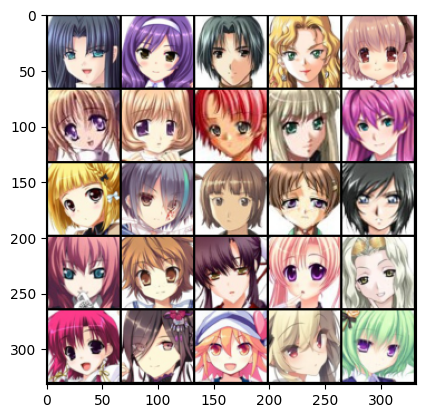

In [ ]:
sample = None
for d in dataloader:
  sample = d
  break

show_tensor_images(sample)
  

You looking at above sample of image this nice to show as If not than you provide what problem to face you. 

## Third Chapter: Build Generator and Discriminator Model.

First understand what is do each of this model.


**Generator Model**: This model input as a noise and turn into data that look like real.

**Discriminator Model:** This model input as a generate sample or real sample to predict whather is real of fake.

This two model also like as thif and police. why becuse thif **(Generator)** try to best work for fool the police and police **(Discriminator)** try to best for predict what real and fake.


If you understand basic work for two model. now time create generator architacture and discriminator architacture using as a pytorch frame work.





In [ ]:
class Generator(nn.Module):
    '''
    Generator Class
    Values:
        z_dim: This is dimension of noise vector.
        im_chan: the number of channels of the output image, a scalar
              (Anime dataset is rgb, so 3 is your default)
        hidden_dim: It's a scaler value to specify number of hidden unit.
    '''
    def __init__(self, z_dim=10, im_chan=3, hidden_dim=64):
        super(Generator, self).__init__()
        self.z_dim = z_dim 
        # Build the neural network
        self.gen = nn.Sequential(
            self.make_gen_block(z_dim, hidden_dim * 8),
            self.make_gen_block(hidden_dim * 8, hidden_dim * 4),
            self.make_gen_block(hidden_dim * 4, hidden_dim * 2),
            self.make_gen_block(hidden_dim * 2, hidden_dim),
            self.make_gen_block(hidden_dim, im_chan, kernel_size=4, final_layer=True),
        )

        self.layers_st = []
    
    # Create one usefull method for oneline to complete squence of layer add
    def make_gen_block(self, input_channels, output_channels, kernel_size=3, stride=2, final_layer=False):
        '''
        Function to return a sequence of operations corresponding to a generator block of DCGAN;
        a transposed convolution, a batchnorm (except in the final layer), and an activation.
        Parameters:
            input_channels: how many channels the input feature representation has
            output_channels: how many channels the output feature representation should have
            kernel_size: the size of each convolutional filter, equivalent to (kernel_size, kernel_size)
            stride: It's stride of the convolution
            final_layer: a boolean, true if it is the final layer and false otherwise 
                      (add Tanh activation and not added batchnorm)
        '''
        if not final_layer:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
                nn.BatchNorm2d(output_channels),
                nn.ReLU(inplace=True),
            )
        else:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
                nn.Tanh(),
            )

    def forward(self, noise):
        '''
        Function is completing a forward pass input noise into generator and return genrated image.
        Parameters:
            noise: a noise tensor with dimensions (n_samples, z_dim)
        '''
        
        x = noise.view(len(noise), self.z_dim, 1, 1)
        return self.gen(x)
    
    def layers(self):
      """
      It's one usefull function for get all layer in generator class.
      """
      for i,layer in enumerate(self.gen):
        for l in self.gen[i]:
           self.layers_st.append(l)
      return self.layers_st
          

def get_noise(n_samples, z_dim, device='cpu'):
    '''
    Function for creating noise vectors: Given the dimensions (n_samples, z_dim)
    creates a tensor of that shape filled with random numbers from the normal distribution.
    Parameters:
        n_samples: It's scaler value to specify number of sample generate.
        z_dim: It's also scaler value to specify dimension of noise vector
        device: It's device type which you using it.

        returns ~ This function return as a noise vector.
    '''
    return torch.randn(n_samples, z_dim, device=device)


If you complete Generator class. than time to move on and create Discriminator class. 


In [ ]:

class Discriminator(nn.Module):
  def __init__(self,im_chan=3, hidden_dim=64):
    super(Discriminator,self).__init__()
    
    # Sequence of layer add
    self.disc = nn.Sequential(
        nn.Conv2d(im_chan,hidden_dim,kernel_size=4,stride=2,padding=1),
        nn.LeakyReLU(0.2,inplace=True),
        self.get_disc_group_of_layer(hidden_dim,hidden_dim*2,kernel_size=(4,4),strides=2),
        self.get_disc_group_of_layer(hidden_dim*2,hidden_dim*4,kernel_size=(4,4),strides=2),
        self.get_disc_group_of_layer(hidden_dim*4,hidden_dim*8,kernel_size=(4,4),strides=2),
        self.get_disc_group_of_layer(hidden_dim*8,1,kernel_size=(4,4),strides=1,final_layer=True),
    )
  
  # This one usefull function for help you to get sequence of layer add just write oneline.
  def get_disc_group_of_layer(self,input_channels,output_channels,kernel_size=4,strides=1,final_layer=False):
    
    if not final_layer:
      return nn.Sequential(
          nn.Conv2d(input_channels,output_channels,kernel_size,strides,padding=(1,1)),
          nn.BatchNorm2d(output_channels),
          nn.LeakyReLU(0.2,inplace=True)
      )
    else:
      return nn.Sequential(
          nn.Conv2d(input_channels,output_channels,kernel_size,strides,padding=0),
          nn.Sigmoid()       

      )


  def forward(self,x):

    """
    This method to completing forward pass generate image or real image into discriminator model
    and return as a 0 (fake) or 1 (Real).
    """
    disc_pred = self.disc(x)

    return disc_pred

## Fourth Chapter: Train Generator and Discriminator 

In this chapter you see how to train GAN and some of the hyparameter value set.

Downbelow See image to explain how to update two model parameter.

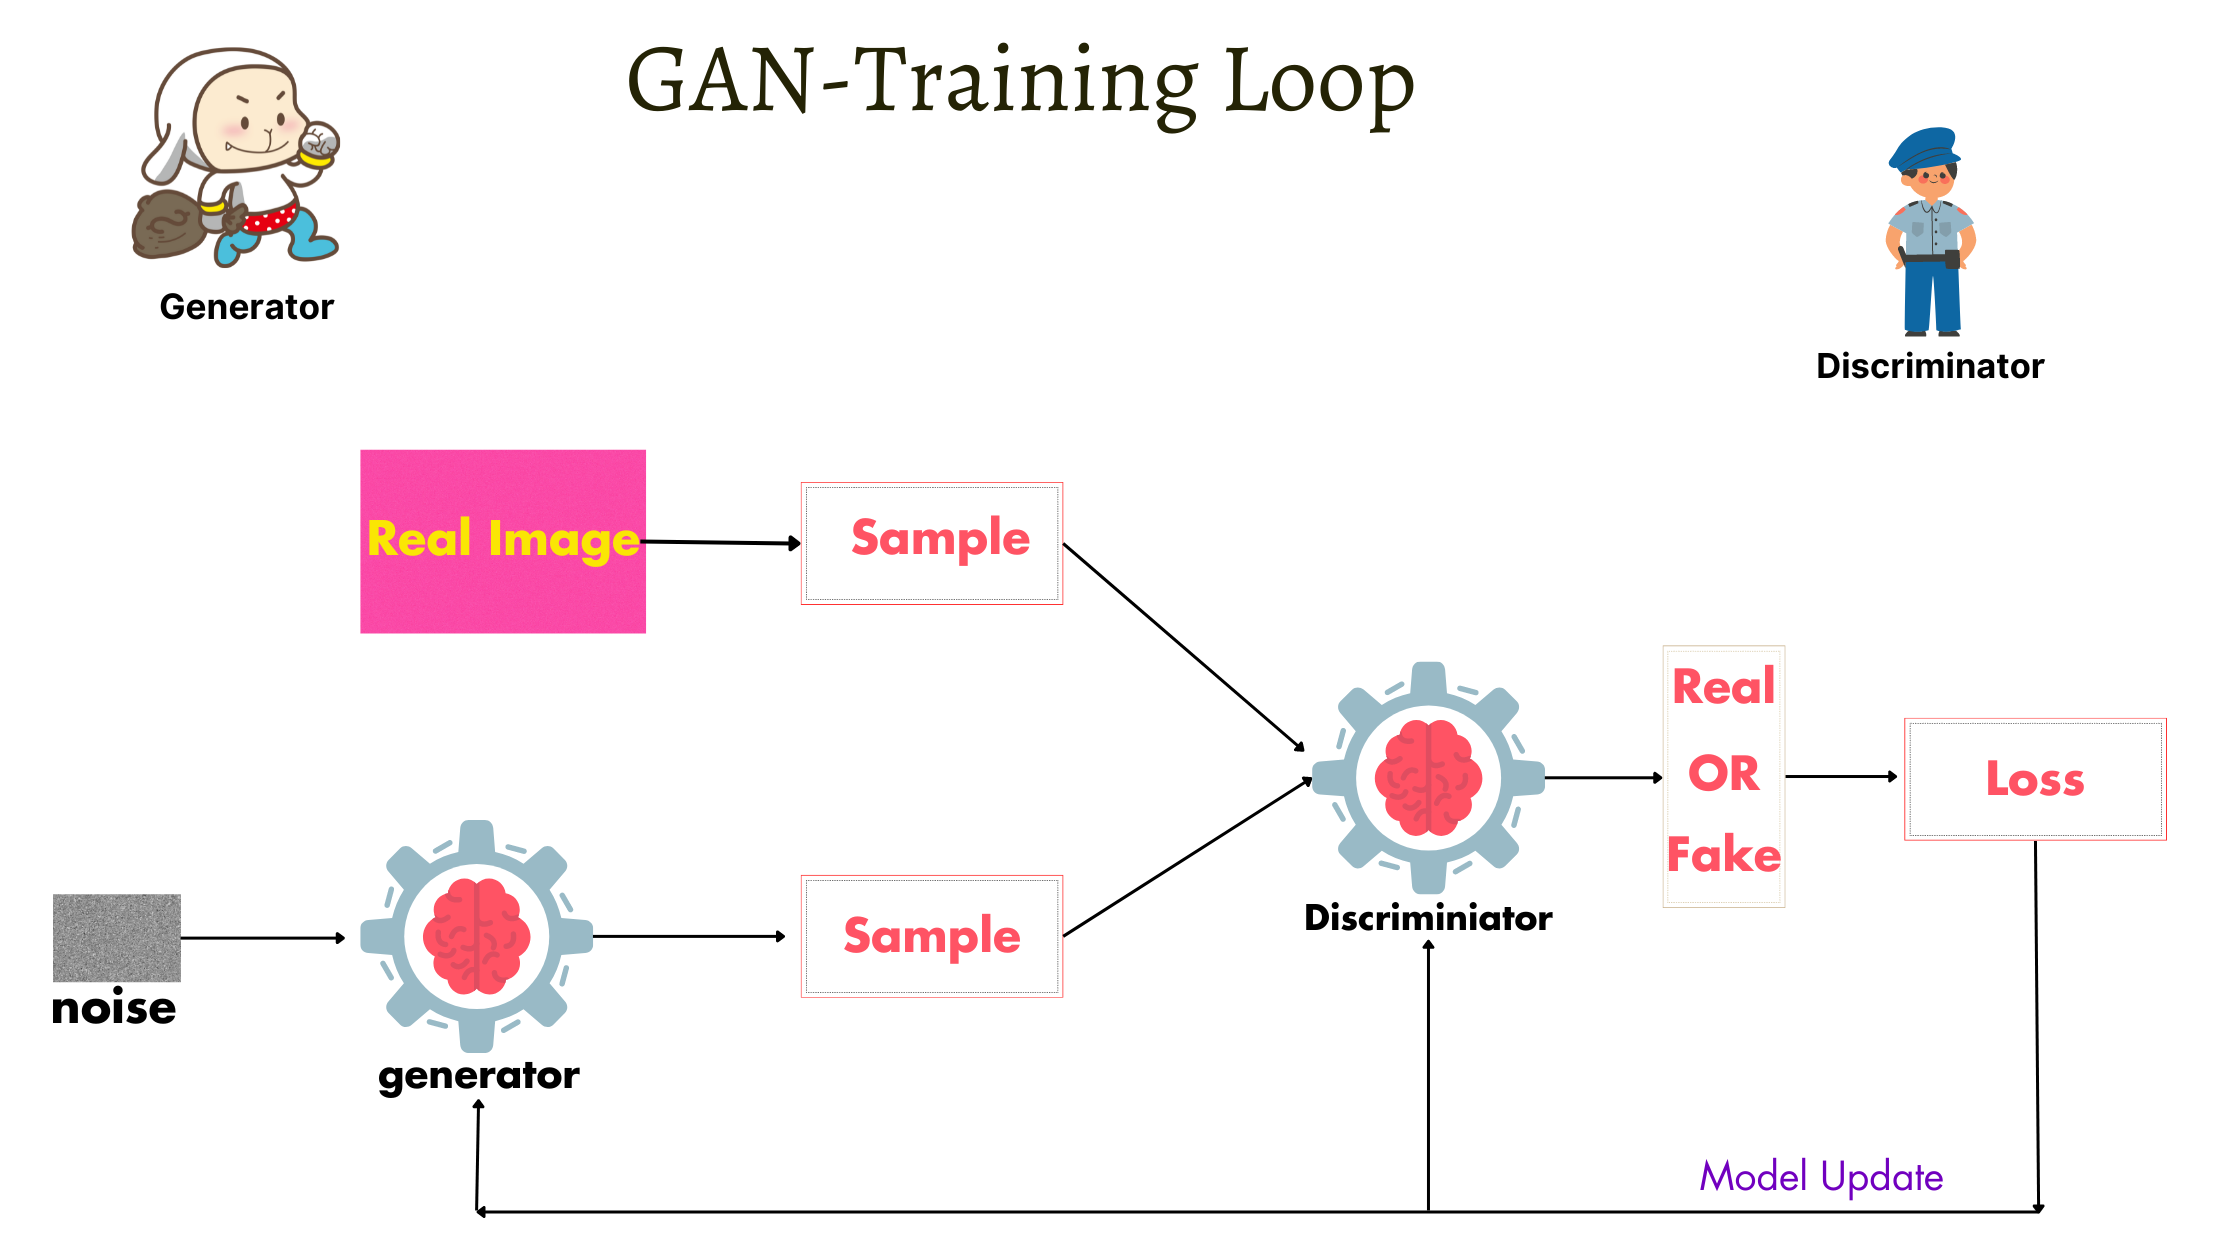


In [ ]:
# Generator Model or object create set to device 
gen = Generator().to(device)
# Adam optimizer using and set some of the parameter to help model learn good way.
gen_opt = torch.optim.Adam(gen.parameters(),lr=lr,betas=(beta_1, beta_2))
# Same as above but this time Discriminatior model create or object
disc = Discriminator().to(device)
# Same this time Adam optimizer using and set some of the parameter to help model learn good way.
disc_opt = torch.optim.Adam(disc.parameters(),lr=lr,betas=(beta_1, beta_2))

def weights_init(m):
    """
    This downbelow function to work for inialize weight of the convulation layer and Batch normalization
    layer in pytorch. 
    follow the step this function:
     1. first take pytorch module as `m` input and check if it's insentece of 
        Conv2d() layer or ConvTranspose2d() layer or BatchNorm2d() layer class.
     2. If Conv2d() or ConvTranspose2d() is match than intialize weight with random number 
        draw form a normal distribution with mean is 0.0 and standard deviation 0.02 set.
     3. If BatchNorm2d() is match than initalize weight same as 2 number point. in this time
        also set layer bias to using zero.
    """
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)

# Apply the weights init function to initalize layer weight.
gen = gen.apply(weights_init)
disc = disc.apply(weights_init)


In [ ]:
pretrain_gen_path = "/content/drive/MyDrive/GAN-Spacialization/GAN-Project/cartoon_gan.pth"
pretrain_disc_path = "/content/drive/MyDrive/GAN-Spacialization/GAN-Project/cartoon_detect.pth"

gen = Generator().to(device)
disc = Discriminator().to(device)

gen_state_dict = torch.load(pretrain_gen_path, map_location=torch.device(device))
gen.load_state_dict(gen_state_dict)

disc_state_dict = torch.load(pretrain_disc_path, map_location=torch.device(device))
disc.load_state_dict(disc_state_dict)

gen_opt = torch.optim.Adam(gen.parameters(),lr=lr,betas=(beta_1, beta_2))
disc_opt = torch.optim.Adam(disc.parameters(),lr=lr,betas=(beta_1, beta_2))



### Main Training Loop For Learn GAN

Understand one line at a time:
  * ***nn.BCELoss() :***  This is binary crossentropy for using when you work with two classes. in my case only two classes have one is real another is fake.
  * ***n_epochs :***  it's to specify how many time to model train entire dataset.
  * ***gen.train() or disc.train():*** It's specify model training model or model say I am ready to learn.
  * ***.to(device):*** It's using for move the tensor data specified device. which enable to computation for corresponding device.
  * ***.full():*** It's using for create label specefic batch size. 1 is a real label and 0 is a fake label also set device prameter.

First Discriminator Train With Real Example: 
  * ***disc(actual_image):*** It's predict on real example and return value flatten out.
  * ***criterion(real_pred,label):*** It's calculate by loss between predicted label and real label.
  * ***.backward():*** It's using for backpropagation algoritham when training the model. It's compute the gradient loss with respect to model parameter.

Second Discriminator Train With Fake Example:
  * ***get_noise():*** get the noise value
  * ***gen():*** take noise sample to generate fake image.
  * ***.fill(0):*** actual label set to 0 mean fake.
  * ***disc():*** It's input as fake example and reture predicted label 
  * ***criterion(fake_pred,label):*** Calculate loss between fake image prediction and real label.

Third Generator Model Train:
 1. It's using for all model parameter set to 0 value.
 2. actual label value set 1.
 3. Input generate image into discriminator model.
 4. calculate loss between discriminator prediction and actual label.
 5. Update the weigth base for loss calculate.

If model traing part is complete than move on to visualize fake and real example when model is train. Also that time save it the model becuse you can using this model every whare you can choose.






step: 0, epoch: 357, Disc Loss: 32.88268280029297, Gen Loss: 92.1460952758789


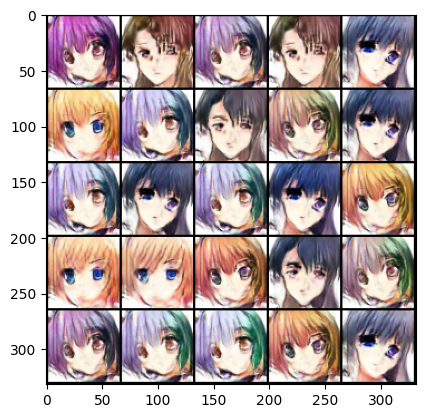

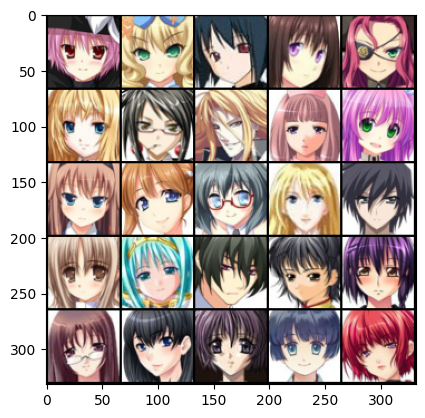

step: 450, epoch: 357, Disc Loss: 0.00344072631560266, Gen Loss: 6.141077518463135


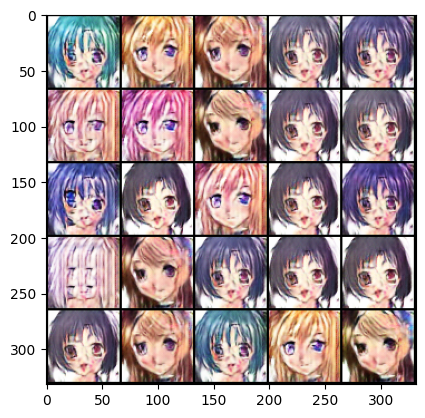

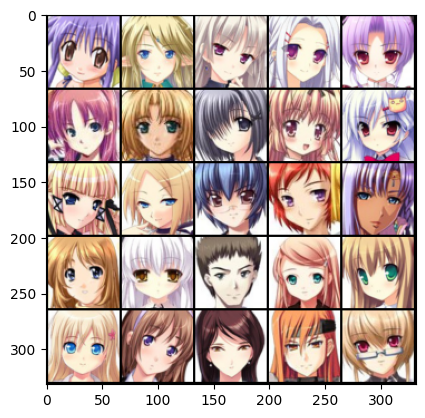

step: 0, epoch: 358, Disc Loss: 0.008226456120610237, Gen Loss: 5.492391109466553


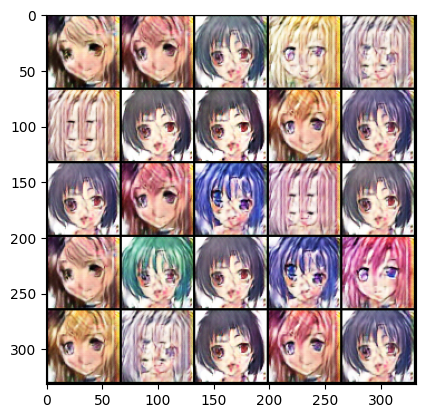

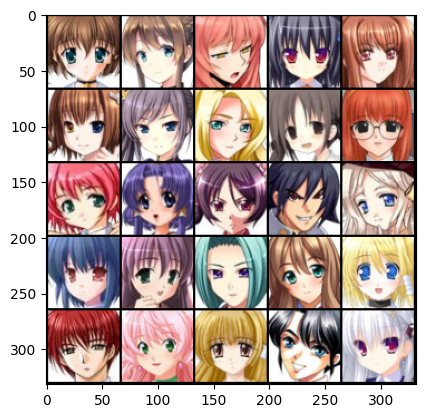

In [ ]:
criterion = nn.BCELoss()
n_epochs = 100
for epoch in range(n_epochs):
  for i, data in enumerate(dataloader):
    gen.train()
    disc.train()
    # Upgrade Discriminator Weights
    disc.zero_grad()
    actual_image = data.to(device)
    b_size = actual_image.size(0)
    label = torch.full((b_size,),1. ,dtype=torch.float,device=device )
    real_pred = disc(actual_image).view(-1)
    real_loss = criterion(real_pred, label)
    real_loss.backward()
    
    noise = get_noise(b_size,z_dim,device)
    fake_image = gen(noise)
    label.fill_(0.)
    fake_pred = disc(fake_image.detach()).view(-1)
    fake_loss = criterion(fake_pred,label)
    fake_loss.backward()
    disc_loss = (real_loss + fake_loss)/2
    disc_opt.step()

    # Upgrade Generative Advairicial neural network
    gen.zero_grad()
    label.fill_(1.)
    fake_disc = disc(fake_image).view(-1)
    fake_gen_loss = criterion(fake_disc,label)
    fake_gen_loss.backward()
    gen_opt.step()
    if i% display_step == 0:
      print(f"step: {i}, epoch: {357+epoch}, Disc Loss: {disc_loss.item()}, Gen Loss: {fake_gen_loss.item()}")
      output = gen(noise).detach()
      # save model
      torch.save(obj=gen.state_dict(),f="cartoon_gan.pth")
      torch.save(obj=disc.state_dict(),f="cartoon_detect.pth")
      show_tensor_images(output)
      show_tensor_images(actual_image)
